In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams


In [210]:
data = pd.read_csv('kc_house_data.csv')

In [8]:
# общая информация о данных
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
# с какими типами данных работаем
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [211]:
# переводим дату в удобный формат
data.date = data.date.astype('datetime64[ns]')

In [12]:
# изучаем общую статистику
# всего 21613 объектов за период 1 год с 2 мая 2014г
# расположены как на берегу моря так и внутри континента
# года постройки от 1900 о 2015
data.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,2014-10-29 04:38:01.959931648,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
min,1.000102e+06,2014-05-02 00:00:00,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,2014-07-22 00:00:00,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,2014-10-16 00:00:00,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,2015-02-17 00:00:00,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,2015-05-27 00:00:00,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631


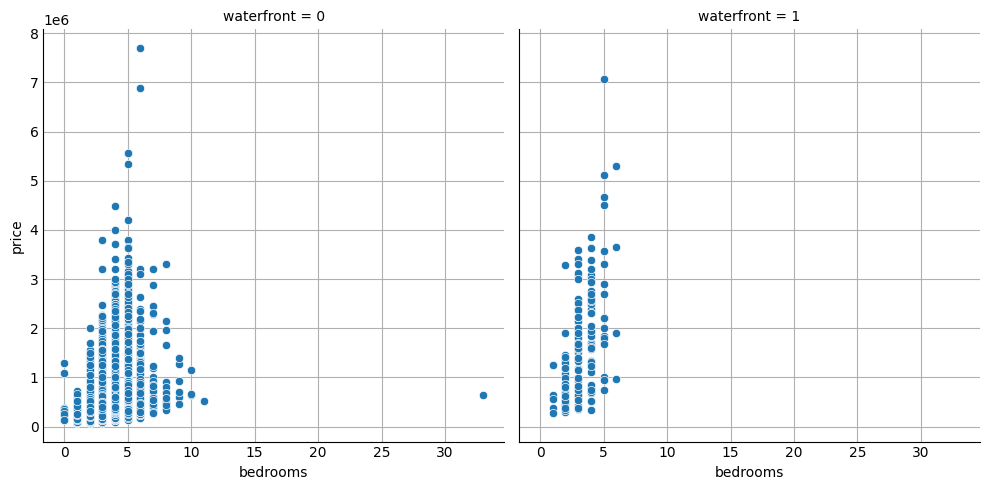

In [126]:
# как распределена стоимость в зависимости от количества комнат и расположения на берегу
sns.relplot(data=data, x='bedrooms', y='price', col='waterfront')

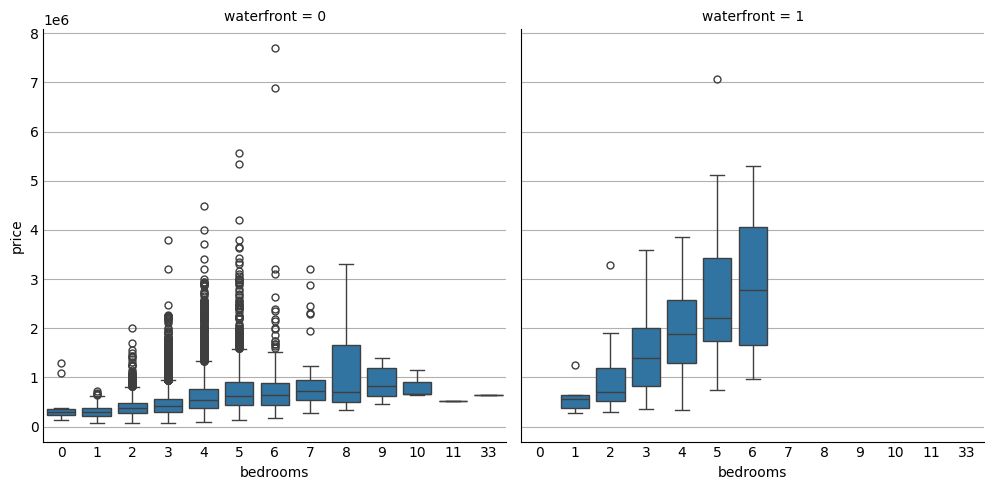

In [132]:
sns.catplot(data=data, x='bedrooms', y='price', col='waterfront', kind='box')

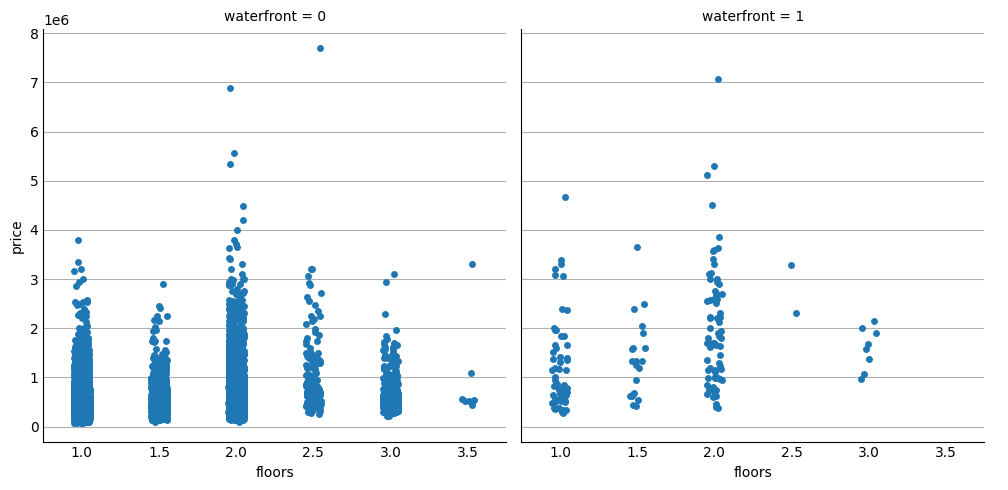

In [185]:
# распределегие стоимости в зависимости от этажности и близости к берегу
sns.catplot(data=data, x='floors', y='price', col='waterfront')

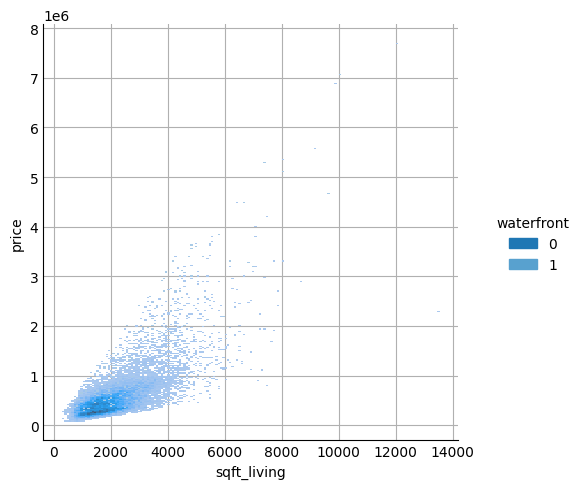

In [139]:
# взаимосвязь цены и жилой площади
sns.displot(data=data, x='sqft_living', y='price', hue='waterfront', kind='hist')

In [151]:
data.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,2014-10-29 04:38:01.959931648,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
min,1.000102e+06,2014-05-02 00:00:00,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,2014-07-22 00:00:00,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,2014-10-16 00:00:00,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,2015-02-17 00:00:00,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,2015-05-27 00:00:00,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631


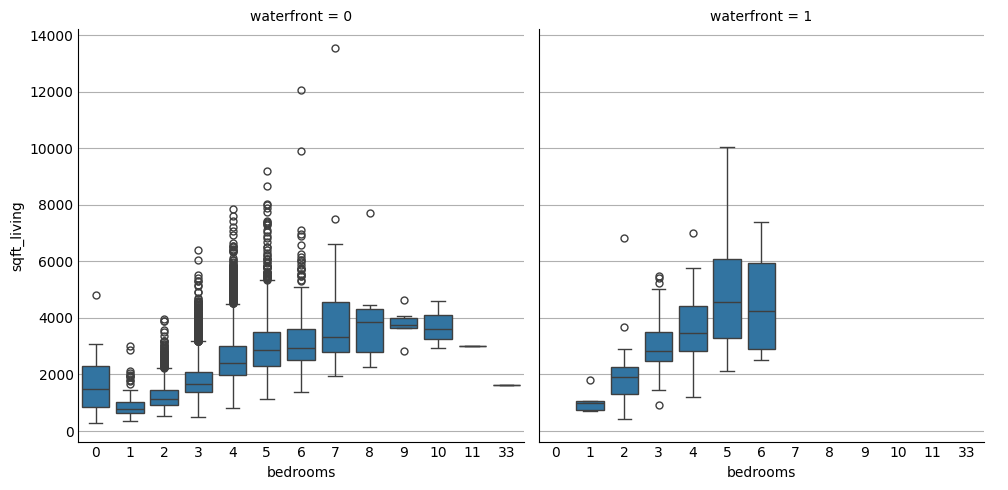

In [140]:
# распределение квадратуры жилой площади в зависимости от количества комнат и близости к берегу
# медианная площадь около 2 000 м.кв. при этом есть очень большое количество объектов выходит за 1,5 интерквартильный размах
sns.catplot(data=data, x='bedrooms', y='sqft_living', col='waterfront', kind='box')

[Text(0.5, 0, 'Год постройки'),
 Text(0, 0.5, 'Количество'),
 Text(0.5, 1.0, 'Распределение домов по году постройки')]

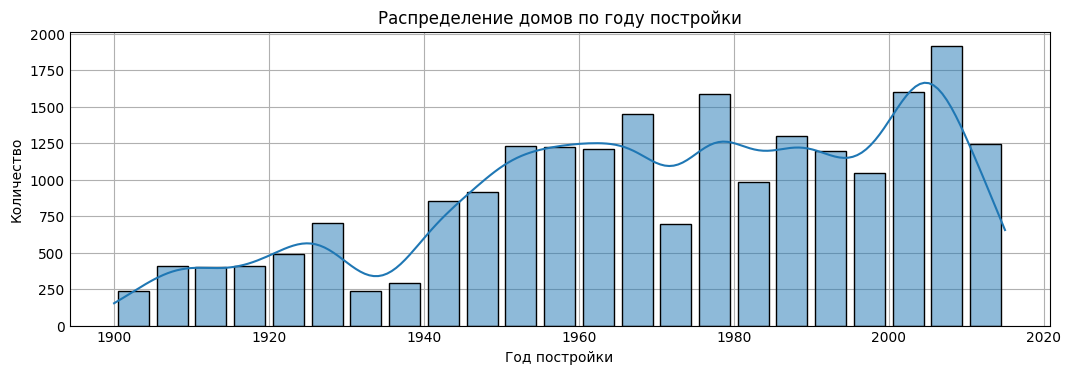

In [182]:
# изучаем распределение домов по году постройки
rcParams['figure.figsize'] = 10,3

ax=sns.histplot(data=data, x="yr_built", binwidth=5, bins=50, kde=True, shrink=.8)

ax.set(
    xlabel='Год постройки',
    ylabel='Количество',
    title='Распределение домов по году постройки'
)



In [234]:
# Только 914 домов из 21 613 было реновировано (4,2%)
len(data[data['yr_renovated']!=0])*100/len(data)
data_pie = [data[data['yr_renovated']!=0].shape[0],data[data['yr_renovated']==0].shape[0]]

[914, 20699]

([<matplotlib.patches.Wedge at 0x1ede0ecac90>,
 [Text(1.0903063836961135, 0.14571200935922715, 'Yes'),
  Text(-1.0903063796426766, -0.1457120396895175, 'No')],
 [Text(0.5947125729251528, 0.07947927783230571, '4%'),
  Text(-0.5947125707141873, -0.07947929437610045, '96%')])

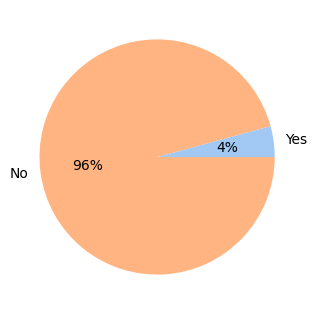

In [243]:
# Добавим признак что дом прошел реновацию
data['renovated']=0
data.loc[data['yr_renovated']!=0, 'renovated']=1
palette_color = sns.color_palette('pastel') 
plt.pie(data_pie, labels=['Yes','No'],colors=palette_color, autopct='%.0f%%')

[Text(0.5, 0, 'Год постройки'),
 Text(0, 0.5, 'Количество'),
 Text(0.5, 1.0, 'Распределение домов по году постройки, которые прошли реновацию')]

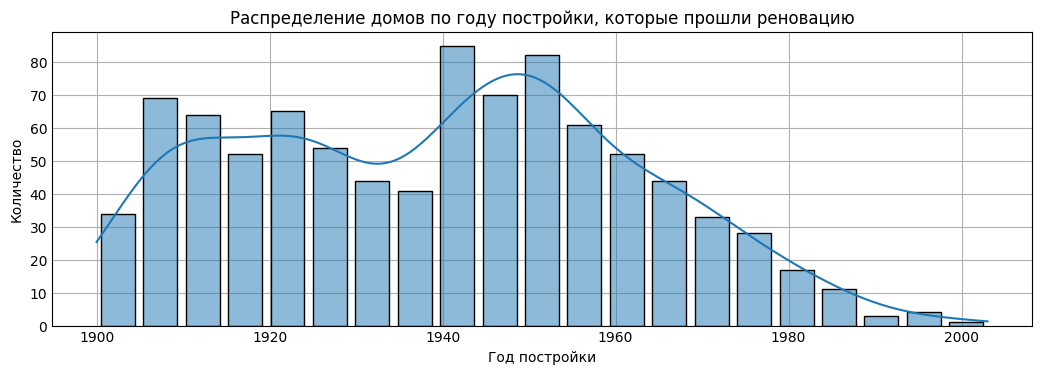

In [216]:
data_renovated = data[data['renovated']==1]
rcParams['figure.figsize'] = 10,3

ax=sns.histplot(data=data_renovated, x="yr_built", binwidth=5, bins=50, kde=True, shrink=.8)

ax.set(
    xlabel='Год постройки',
    ylabel='Количество',
    title='Распределение домов по году постройки, которые прошли реновацию'
)

In [209]:
# Выводы:
# Основная часть домов построена во второй половине 20 века и находится внутри метерика (21450 из 21613)
# Раброс жилой площади от 290 до 13 540 м.кв.
# Существенное влияние на стоимость оказывает расположение на берегу
# Только 914 домов из 21 613 было реновировано (4,2%)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Columns: 21635 entries, id to 0
dtypes: datetime64[ns](1), float64(5), int64(16), void(21613)
memory usage: 3.6 MB


In [ ]:
''' 
Анализ факторов, влияющих на стоимость недвижимости
1. Расположение на берегу существенно увеличивает стоимть
2. Количество спален так же влияет на стоимость
3. Реовация увеличила стоимость объектов, находящихся внутри материка
4. Реновация привела к снижению стоимости объектов на побережье

'''

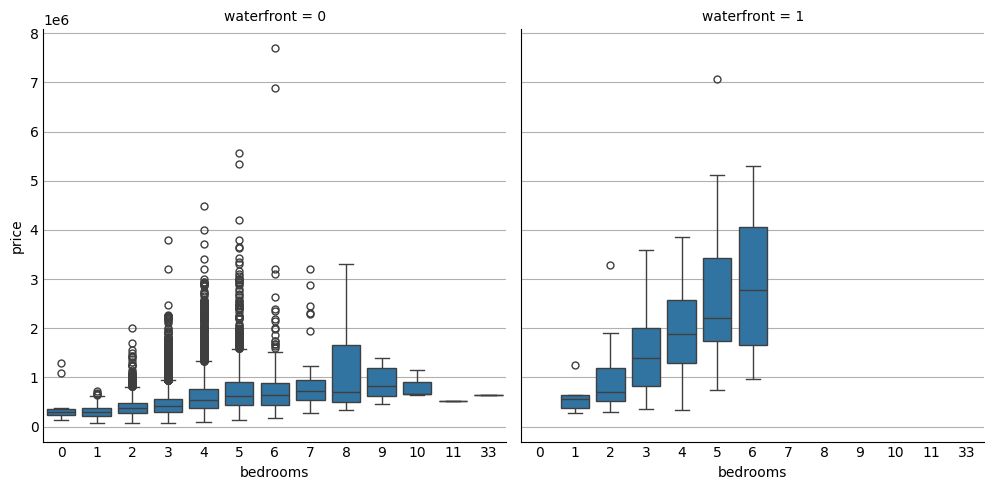

In [217]:
sns.catplot(data=data, x='bedrooms', y='price', col='waterfront', kind='box')

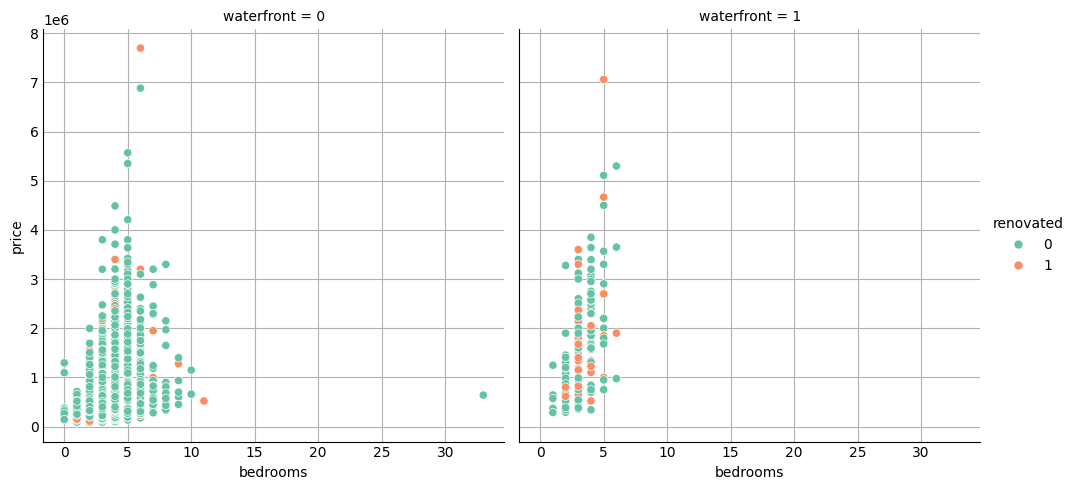

In [231]:
# анализ влияния реновации на стоимость
sns.relplot(data=data, x='bedrooms', y='price', hue='renovated', palette='Set2', col='waterfront')

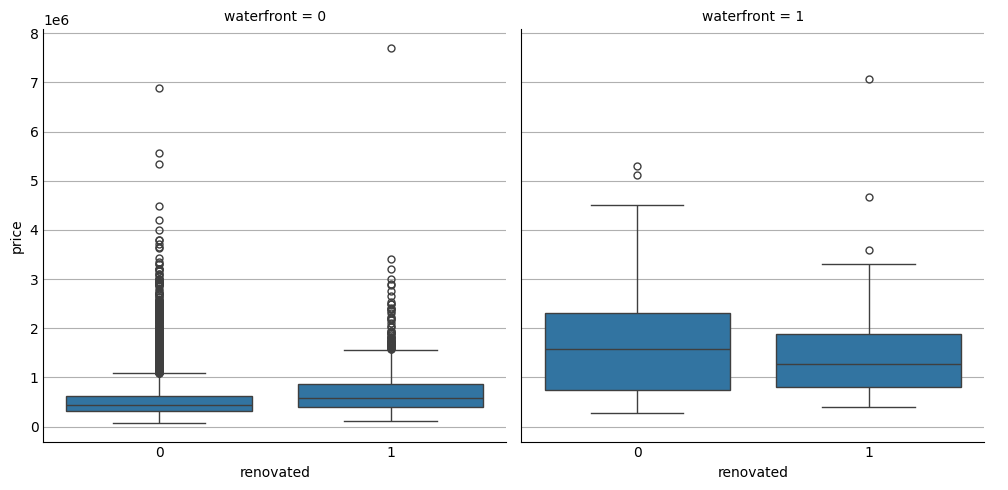

In [232]:
sns.catplot(data=data, x='renovated', y='price', col='waterfront', kind='box')

([<matplotlib.patches.Wedge at 0x1ede0f2ac90>,
 [Text(1.0903063836961135, 0.14571200935922715, 'Yes'),
  Text(-1.0903063796426766, -0.1457120396895175, 'No')],
 [Text(0.5947125729251528, 0.07947927783230571, '4%'),
  Text(-0.5947125707141873, -0.07947929437610045, '96%')])

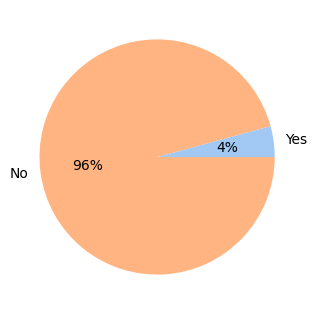

In [244]:
# Доля реновированных домов
palette_color = sns.color_palette('pastel') 
plt.pie(data_pie, labels=['Yes','No'],colors=palette_color, autopct='%.0f%%')

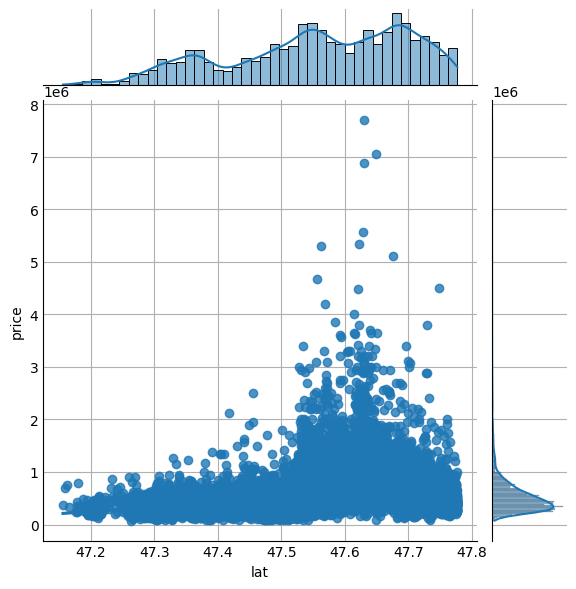

In [262]:
# взаимосвязь широты и цены объектов
sns.jointplot(data=data, x='lat', y='price', kind='reg')